# How to Improve the Safety of Driving in MA
<blockquote>Kaiyu Wang, Jacinto Lemarroy Pipper, Molly Oyer, Peixuan Liu, Sally Lee</blockquote>

## 1. BUSINESS PROBLEAM DEFINITION: 
Our project focuses on helping the Massachusetts Department of Transportation analyze car accidents. We will analyze the relationship between the frequency and severity of car accidents in relation to various factors, for example time period, road sections, weather conditions and locations. We will try to understand the patterns of car crashes in MA and what actions could be taken by the massDOT to prevent crashes in the future. In addition, we are working on joining with another covid dataset to find out the influence of covid on car crashes. After our analysis, suggestions could be made to the massDOT on ways to prevent accidents based on our conclusions.

## 2. DATA SOURCE:
* US Accidents (3 million records -- updated): A Countrywide Traffic Accident Dataset (2016 - 2020)
<blockquote>link: https://www.kaggle.com/sobhanmoosavi/us-accidents
* COVID-19 Open Data: This repository attempts to assemble the largest Covid-19 epidemiological database in addition to a powerful set of expansive covariates. 
<blockquote>link: https://github.com/GoogleCloudPlatform/covid-19-open-data

### 2.1 Overview of Carcrash Dataset:
* ID: This is a unique identifier of the accident record.
* Start_Time: Shows start time of the accident in local time zone.
* Start_Lat: Shows latitude in GPS coordinate of the start point.
* Start_Lng: Shows longitude in GPS coordinate of the start point.
* County: Shows the county in address field.
* Zipcode: Shows the zipcode in address field.
* Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic and 4 indicates largest.
* Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
* Crossing: A POI annotation which indicates presence of crossing in a nearby location.
* Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.  
(And some similar coloums:Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal)

In [57]:
%%bigquery
SELECT * FROM `ba775-b2-team6.team6.US_Accidents` limit 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.51rows/s]


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance_mi_,Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-38249,2,2016-09-01 09:14:56+00:00,2016-09-01 15:14:56+00:00,41.03674,-73.67549,41.08345,-73.6653,3.271,Between CT-120A/King St/Exit 27 and Round Hill...,...,False,False,False,False,False,False,nan,nan,nan,nan
1,A-1251601,2,2017-10-09 15:46:08+00:00,2017-10-09 21:46:08+00:00,41.03674,-73.67549,41.08345,-73.6653,3.271,Between CT-120A/King St/Exit 27 and Round Hill...,...,False,False,False,False,False,False,nan,nan,nan,nan
2,A-1506619,2,2016-09-16 07:21:23+00:00,2016-09-16 13:21:23+00:00,41.03674,-73.67549,41.08345,-73.6653,3.271,Between CT-120A/King St/Exit 27 and Round Hill...,...,False,False,False,False,False,False,nan,nan,nan,nan


### 2.2 Overview of COVID Dataset:
* Date: Date when the Covid-19 reported.
* New_confirmed: Count of new cases confirmed after positive test on this date
* Cumulative_confirmed: Cumulative sum of cases confirmed after positive test to date
* public_transport_closing: Public transport is not operational
* stay_at_home_requirements: Self-quarantine at home is mandated for everyone
* stringency_index: Overall stringency index

In [61]:
%%bigquery
SELECT * FROM `bigquery-public-data.covid19_open_data.covid19_open_data` LIMIT 3

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.04rows/s]


,location_key,date,place_id,wikidata_id,datacommons_id,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,aggregation_level,...,cumulative_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,cumulative_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,cumulative_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,location_geometry
0,ES_CT,2021-04-21,ChIJ8_UwhdxbpBIRUMijIeD6AAE,Q5705,nuts/ES51,ES,Spain,ES,ESP,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT(1.47 41.81)
1,ES_CT,2020-10-03,ChIJ8_UwhdxbpBIRUMijIeD6AAE,Q5705,nuts/ES51,ES,Spain,ES,ESP,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT(1.47 41.81)
2,ES_CT,2021-04-26,ChIJ8_UwhdxbpBIRUMijIeD6AAE,Q5705,nuts/ES51,ES,Spain,ES,ESP,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT(1.47 41.81)


This is the number of car crashes happened in each day of week. And we realized that the number of car crashes increased exaggeratedly in Saturday and Sunday in 2020.

## 3. QUESTIONS&ANSWERS

### 3.1 Car Crashes and Their Vicinity

### 3.1.1 Q: The data records if a crash happened within the vicinity of an amenity, bump, crossing, give way, junction, no exit, railway, roundabout, station, stop, traffic calming, traffic signal, and turning loop. How many crashes per month in a certain year happen in the vicinity of these traits? 
&emsp;<i> A: The table shown from the below code contains the first 5 entries in the full table. If the full table is shown, one can see the number of crashes per month in a specific year that happen within the vicinity of a trait.</i> 

In [115]:
%%bigquery
SELECT EXTRACT(month FROM Start_Time) AS Month, EXTRACT(year FROM Start_Time) AS Year,
SUM(CASE WHEN Amenity = true THEN 1 ELSE 0 END) AS Amenity,
SUM(CASE WHEN Bump = true THEN 1 ELSE 0 END) AS Bump,
SUM(CASE WHEN Crossing = true THEN 1 ELSE 0 END) AS Crossing,
SUM(CASE WHEN Give_Way = true THEN 1 ELSE 0 END) AS Give_Way,
SUM(CASE WHEN Junction = true THEN 1 ELSE 0 END) AS Junction,
SUM(CASE WHEN No_Exit = true THEN 1 ELSE 0 END) AS No_Exit,
SUM(CASE WHEN Railway = true THEN 1 ELSE 0 END) AS Railway,
SUM(CASE WHEN Roundabout = true THEN 1 ELSE 0 END) AS Roundabout,
SUM(CASE WHEN Station = true THEN 1 ELSE 0 END) AS Station,
SUM(CASE WHEN Stop = true THEN 1 ELSE 0 END) AS Stop,
SUM(CASE WHEN Traffic_Calming = true THEN 1 ELSE 0 END) AS Traffic_Calming,
SUM(CASE WHEN Traffic_Signal = true THEN 1 ELSE 0 END) AS Traffic_Signal,
SUM(CASE WHEN Turning_Loop = true THEN 1 ELSE 0 END) AS Turning_Loop
FROM `ba775-b2-team6.team6.carcrash_MA`
GROUP BY Month, Year
ORDER BY Year, Month DESC 
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.22rows/s]


,Month,Year,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,12,2016,13,0,43,0,45,0,4,0,39,4,0,78,0
1,11,2016,19,0,62,0,65,0,7,0,53,7,0,83,0
2,10,2016,23,0,45,1,51,0,6,0,37,3,0,66,0
3,9,2016,18,0,45,1,46,2,8,0,31,3,0,54,0
4,8,2016,25,0,46,0,71,2,8,0,38,7,0,71,0


### 3.1.2 Q: Are there any traits near which no accidents occurred? Is this surprising? What are the traits with the highest number of accidents occuring in their vicinity?
&emsp;<i> A: Roundabout and Turning Loop have no recorded accidents that occurred within their vicinities. Roundabout is a bit surprising, as there are many different ways to enter, exit, and merge. From now on, I will remove Roundabout and Turning Loop since they are unrelated to any accident.Traffic signal and Junction have the most accidents occurring near them. This is not surprising, as both traffic signals and junctions involve drivers having to pay attention to stop lights and right-of-way rules.</i> 

In [93]:
%%bigquery
SELECT
SUM(CASE WHEN Amenity = true THEN 1 ELSE 0 END) AS Amenity,
SUM(CASE WHEN Bump = true THEN 1 ELSE 0 END) AS Bump,
SUM(CASE WHEN Crossing = true THEN 1 ELSE 0 END) AS Crossing,
SUM(CASE WHEN Give_Way = true THEN 1 ELSE 0 END) AS Give_Way,
SUM(CASE WHEN Junction = true THEN 1 ELSE 0 END) AS Junction,
SUM(CASE WHEN No_Exit = true THEN 1 ELSE 0 END) AS No_Exit,
SUM(CASE WHEN Railway = true THEN 1 ELSE 0 END) AS Railway,
SUM(CASE WHEN Roundabout = true THEN 1 ELSE 0 END) AS Roundabout,
SUM(CASE WHEN Station = true THEN 1 ELSE 0 END) AS Station,
SUM(CASE WHEN Stop = true THEN 1 ELSE 0 END) AS Stop,
SUM(CASE WHEN Traffic_Calming = true THEN 1 ELSE 0 END) AS Traffic_Calming,
SUM(CASE WHEN Traffic_Signal = true THEN 1 ELSE 0 END) AS Traffic_Signal,
SUM(CASE WHEN Turning_Loop = true THEN 1 ELSE 0 END) AS Turning_Loop
FROM `ba775-b2-team6.team6.carcrash_MA`

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.12s/rows]


,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,794,3,2199,46,2987,8,290,0,1807,200,4,3230,0


### 3.1.3 Q: What percent of accidents per year happen near each trait?
&emsp;<i> A: This verifies our previous conclusion that most accidents are near traffic signals and junctions, with 13.94% and 12.5% of accidents in 2020 occurring there, respectively.  </i> 

In [117]:
%%bigquery
SELECT EXTRACT(year FROM Start_Time) AS Year,
ROUND(SUM(CASE WHEN Amenity = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_amenity,
ROUND(SUM(CASE WHEN Bump = true THEN 1 ELSE 0 END) /COUNT(*)*100,2) percent_crashes_near_Bump,
ROUND(SUM(CASE WHEN Crossing = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_Crossing,
ROUND(SUM(CASE WHEN Give_Way = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_GiveWay,
ROUND(SUM(CASE WHEN Junction = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_Junction,
ROUND(SUM(CASE WHEN No_Exit = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_No_Exit,
ROUND(SUM(CASE WHEN Railway = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_Railway,
ROUND(SUM(CASE WHEN Station = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_Station,
ROUND(SUM(CASE WHEN Stop = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_Stop,
ROUND(SUM(CASE WHEN Traffic_Calming = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_Traffic_Calming,
ROUND(SUM(CASE WHEN Traffic_Signal = true THEN 1 ELSE 0 END)/COUNT(*)*100,2) percent_crashes_near_Traffic_Signal
FROM `ba775-b2-team6.team6.carcrash_MA`
GROUP BY Year
ORDER BY Year

Downloading: 100%|██████████| 5/5 [00:00<00:00,  5.20rows/s]


,Year,percent_crashes_near_amenity,percent_crashes_near_Bump,percent_crashes_near_Crossing,percent_crashes_near_GiveWay,percent_crashes_near_Junction,percent_crashes_near_No_Exit,percent_crashes_near_Railway,percent_crashes_near_Station,percent_crashes_near_Stop,percent_crashes_near_Traffic_Calming,percent_crashes_near_Traffic_Signal
0,2016,3.89,0.03,10.21,0.10,13.54,0.13,1.50,7.82,0.93,0.03,14.44
1,2017,2.58,0.02,8.13,0.12,11.63,0.00,1.02,6.29,0.74,0.02,12.79
2,2018,2.21,0.02,7.38,0.10,11.98,0.02,0.89,5.28,0.83,0.02,11.00
3,2019,4.11,0.00,9.88,0.20,10.22,0.04,1.18,7.94,0.92,0.00,12.41
4,2020,3.29,0.00,8.79,0.32,12.50,0.01,1.28,8.47,0.66,0.01,13.94


### 3.1.4 Q: The data shows that no accidents happened near roundabouts, as we have seen. In MA, roundabouts are often referred to as a rotary. How many accidents happened in a rotary if we search by name? 
&emsp;<i> A: There are 36 crashes that take place in a rotary according to the street name column, but are not marked Roundabout as they should be. This highlights what can happen when aggregating data where naming conventions of column items are not consistent throughout the regions the data is collected from.  </i> 

In [156]:
%%bigquery
SELECT COUNT(*)num_rotaries
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE Street LIKE '%Rotary%' 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.14s/rows]


,num_rotaries
0,36


### 3.1.5 Q: What severity is the most common for crashes? What traits are associated with more severe crashes, meaning crashes that cause the greatest delay of traffic?
&emsp;<i> A: Here, a severity of 1 is the least impactful to traffic increasing to a severity of 4 indicating the accident caused a large traffic delay. From the table, we see the most common severity level is 2, with 15,702 crashes in this category. Accidents near junctions tend to run on the more severe side.  </i> 

In [125]:
%%bigquery
SELECT Severity, COUNT(*) AS total_accidents_of_severity,
SUM(CASE WHEN Amenity = true THEN 1 ELSE 0 END) AS Amenity,
SUM(CASE WHEN Bump = true THEN 1 ELSE 0 END) AS Bump,
SUM(CASE WHEN Crossing = true THEN 1 ELSE 0 END) AS Crossing,
SUM(CASE WHEN Give_Way = true THEN 1 ELSE 0 END) AS Give_Way,
SUM(CASE WHEN Junction = true THEN 1 ELSE 0 END) AS Junction,
SUM(CASE WHEN No_Exit = true THEN 1 ELSE 0 END) AS No_Exit,
SUM(CASE WHEN Railway = true THEN 1 ELSE 0 END) AS Railway,
SUM(CASE WHEN Station = true THEN 1 ELSE 0 END) AS Station,
SUM(CASE WHEN Stop = true THEN 1 ELSE 0 END) AS Stop,
SUM(CASE WHEN Traffic_Calming = true THEN 1 ELSE 0 END) AS Traffic_Calming,
SUM(CASE WHEN Traffic_Signal = true THEN 1 ELSE 0 END) AS Traffic_Signal
FROM `ba775-b2-team6.team6.carcrash_MA`
GROUP BY Severity
ORDER BY Severity

Downloading: 100%|██████████| 4/4 [00:01<00:00,  3.57rows/s]


,Severity,total_accidents_of_severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Calming,Traffic_Signal
0,1,177,2,0,1,0,35,0,1,3,2,0,4
1,2,15702,701,3,1859,33,1586,8,229,1644,187,4,2670
2,3,8837,83,0,313,10,1328,0,55,111,10,0,496
3,4,405,8,0,26,3,38,0,5,49,1,0,60


### 3.2 Car Crashes and Weather Condition Ⅰ (Temperature,Wind Speed, and Humidity)

### 3.2.1 Q: Compute the average temperature, wind speed, and humidity of accidents that took place each month.

In [143]:
%%bigquery
SELECT EXTRACT(month FROM Start_Time) month, COUNT(ID) num_accident, ROUND(AVG(Temperature_F_),1) avg_temp,
ROUND(AVG(Wind_Speed_mph_),1) avg_wind_speed, ROUND(AVG(Humidity___),1) avg_humidity
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Wind_Speed_mph_) = FALSE AND IS_NAN(Temperature_F_) = False
AND IS_NAN(Humidity___) = False
GROUP BY month
ORDER BY month
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.95rows/s]


,month,num_accident,avg_temp,avg_wind_speed,avg_humidity
0,1,1830,30.1,10.4,64.3
1,2,1735,35.6,9.9,66.1
2,3,1755,37.8,11.3,63.3
3,4,1947,46.3,11.9,66.0
4,5,1957,60.4,9.8,61.7


### 3.2.2 Q: Is temperature associated with the number of accidents? If so, how strong is that association?
&emsp;<i> A: The coefficient of correlation between temperature and the number of accidents is 0.10. It means these two variables have a very weak positive relation.  </i> 

In [4]:
%%bigquery
SELECT CORR(Temperature_F_, num_accident) correlation_coefficient
FROM
(SELECT Temperature_F_, Count(ID) num_accident
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Temperature_F_) = False
GROUP BY Temperature_F_)

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.49s/rows]


,correlation_coefficient
0,0.096958


### 3.2.3 Q: How is wind speed associated with the number of accidents?
&emsp;<i> A: The coefficient of correlation between the number of car accidents and wind speed is -0.626, which means these variables have a moderate negative association. </i> 

In [5]:
%%bigquery
SELECT CORR(Wind_Speed_mph_, num_accident)
FROM
(SELECT Wind_Speed_mph_, Count(ID) num_accident
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Wind_Speed_mph_) = False
GROUP BY Wind_Speed_mph_)

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.15s/rows]


,f0_
0,-0.625823


### 3.2.4 Q: Do humidity and the number of car accidents show statistical association?
&emsp;<i> A: The coefficient of correlation between humidity and car crash is 0.633. It means they have a moderate positive association. </i> 

In [6]:
%%bigquery
SELECT CORR(Humidity___, num_accident)
FROM
(SELECT Humidity___, Count(ID) num_accident
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Humidity___) = False
GROUP BY Humidity___)

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.22s/rows]


,f0_
0,0.633796


### 3.2.5 Q: A very strong wind even can overthrow a car. How strong was the wind of car accidents in Massachusetts?
&emsp;<i> A: More than half of car accidents were in the wind which has a speed between 0 and 10mph. </i> 

In [7]:
%%bigquery
SELECT
    # Interval_start
    CASE WHEN 0<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 10 THEN 0
    WHEN 10<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 20 THEN 10
    WHEN 20<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 30 THEN 20
    WHEN 30<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 40 THEN 30
    WHEN 40<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 50 THEN 40
    WHEN 50<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 60 THEN 50
    WHEN 60<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 70 THEN 60
    WHEN 70<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 80 THEN 70
    WHEN 80<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 90 THEN 80
    WHEN 90<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 100 THEN 90
    WHEN 100<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 110 THEN 100
    WHEN 110<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 120 THEN 110
    ELSE 120 END AS Interval_start,
    #Interval_end
    CASE WHEN 0<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 10 THEN 10
    WHEN 10<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 20 THEN 20
    WHEN 20<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 30 THEN 30
    WHEN 30<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 40 THEN 40
    WHEN 40<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 50 THEN 50
    WHEN 50<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 60 THEN 60
    WHEN 60<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 70 THEN 70
    WHEN 70<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 80 THEN 80
    WHEN 80<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 90 THEN 90
    WHEN 90<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 100 THEN 100
    WHEN 100<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 110 THEN 110
    WHEN 110<= Wind_Speed_mph_ AND Wind_Speed_mph_ < 120 THEN 120
    ELSE 120 END AS Interval_end,
    COUNT(ID) num_accident
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Wind_Speed_mph_) = FALSE
GROUP BY Interval_start, Interval_end
ORDER BY Interval_start

Downloading: 100%|██████████| 6/6 [00:01<00:00,  5.98rows/s]


,Interval_start,Interval_end,num_accident
0,0,10,13348
1,10,20,8944
2,20,30,967
3,30,40,91
4,40,50,6
5,110,120,1


Interval Start: Inclusive, Interval End: Exclusive

### 3.2.6 Q: Humidity not only affects drivers' health conditions but also can cause vehicle breakdowns. In which interval of humidity did car crashes take place the most?

In [8]:
%%bigquery
SELECT
    # Interval_start
    CASE WHEN 0<= Humidity___ AND Humidity___ < 10 THEN 0
    WHEN 10<= Humidity___ AND Humidity___ < 20 THEN 10
    WHEN 20<= Humidity___ AND Humidity___ < 30 THEN 20
    WHEN 30<= Humidity___ AND Humidity___ < 40 THEN 30
    WHEN 40<= Humidity___ AND Humidity___ < 50 THEN 40
    WHEN 50<= Humidity___ AND Humidity___ < 60 THEN 50
    WHEN 60<= Humidity___ AND Humidity___ < 70 THEN 60
    WHEN 70<= Humidity___ AND Humidity___ < 80 THEN 70
    WHEN 80<= Humidity___ AND Humidity___ < 90 THEN 80
    WHEN 90<= Humidity___ AND Humidity___ < 100 THEN 90
    ELSE 100 END AS Interval_start,
    #Interval_end
    CASE WHEN 0<= Humidity___ AND Humidity___ < 10 THEN 10
    WHEN 10<= Humidity___ AND Humidity___ < 20 THEN 20
    WHEN 20<= Humidity___ AND Humidity___ < 30 THEN 30
    WHEN 30<= Humidity___ AND Humidity___ < 40 THEN 40
    WHEN 40<= Humidity___ AND Humidity___ < 50 THEN 50
    WHEN 50<= Humidity___ AND Humidity___ < 60 THEN 60
    WHEN 60<= Humidity___ AND Humidity___ < 70 THEN 70
    WHEN 70<= Humidity___ AND Humidity___ < 80 THEN 80
    WHEN 80<= Humidity___ AND Humidity___ < 90 THEN 90
    WHEN 90<= Humidity___ AND Humidity___ < 100 THEN 100
    ELSE 100 END AS Interval_end,
    COUNT(ID) num_accident
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Humidity___) = FALSE
GROUP BY Interval_start, Interval_end
ORDER BY Interval_start

Downloading: 100%|██████████| 11/11 [00:01<00:00,  8.00rows/s]


,Interval_start,Interval_end,num_accident
0,0,10,1
1,10,20,107
2,20,30,775
3,30,40,1953
4,40,50,3051
5,50,60,3402
6,60,70,3430
7,70,80,3436
8,80,90,4544
9,90,100,3418


Interval Start: Inclusive, Interval End: Exclusive

### 3.2.7 Q: These two variables might affect the severity of accidents. Let’s see how these variables differ by severity.
&emsp;<i> A: As severity increases, the average humidity decreases. Wind speed, on the other hand, shows a reverse pattern. In terms of standard deviation, the standard deviation of humidity is about 4 times greater than that of wind speed in all severity. It means humidity is more dispersed than wind speed.</i> 

In [9]:
%%bigquery
SELECT Severity, ROUND(AVG(Humidity___),2) avg_humidity, ROUND(STDDEV_SAMP(Humidity___),2) stdev_humidity,
ROUND(AVG(Wind_Speed_mph_),2) avg_wind_speed, ROUND(STDDEV_SAMP(Wind_Speed_mph_),2) stdev_wind_speed
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Humidity___)= False
AND IS_NAN(Wind_Speed_mph_)=False
GROUP BY Severity
ORDER BY Severity

Downloading: 100%|██████████| 4/4 [00:01<00:00,  4.00rows/s]


,Severity,avg_humidity,stdev_humidity,avg_wind_speed,stdev_wind_speed
0,1,70.87,20.43,7.25,6.12
1,2,66.80,20.51,9.55,5.43
2,3,65.49,20.99,9.54,5.44
3,4,65.16,23.07,11.59,7.10


Interval Start: Inclusive, Interval End: Exclusive

### 3.3 Car Crashes and Weather Conditions Ⅱ （Visibility and Specific Weather Condition）

### 3.3.1 Q: What is the average number of visibility and precipitation for accidents in each month?
&emsp;<i> A: The average precipitation is the largest in July, and the average visibility is the lowest in February.  April has the highest number of accidents, when the monthly average precipitation is higher and the visibility is lower.</i> 

In [138]:
%%bigquery
SELECT
    EXTRACT(MONTH FROM Start_Time) AS Month,
    ROUND(AVG(Visibility_mi_),3) AS Avg_Visibility,
    ROUND(AVG(Precipitation_in_),3) AS Avg_Precipitation,
    COUNT(ID) AS Num_Accidents
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Precipitation_in_) = FALSE AND IS_NAN(Visibility_mi_) = FALSE
GROUP BY Month
ORDER BY Month

Downloading: 100%|██████████| 12/12 [00:01<00:00, 11.94rows/s]


,Month,Avg_Visibility,Avg_Precipitation,Num_Accidents
0,1,7.407,0.007,779
1,2,5.911,0.011,754
2,3,6.725,0.016,863
3,4,7.511,0.017,1536
4,5,9.021,0.007,1351
5,6,8.910,0.009,1299
6,7,8.866,0.022,834
7,8,9.274,0.010,814
8,9,8.577,0.011,1035
9,10,7.941,0.012,1152


### 3.3.2 Q: How did the average visibility and precipitation affect the severity level of accidents?
&emsp;<i> A: The lower the visibility, the more severe the accidents could be.</i> 

In [139]:
%%bigquery
SELECT
    Severity,
    ROUND(AVG(Visibility_mi_),3) AS Avg_Visibility,
    ROUND(AVG(Precipitation_in_),3) AS Avg_Precipitation,
    COUNT(ID) AS Num_Accidents
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE IS_NAN(Precipitation_in_) = FALSE AND IS_NAN(Visibility_mi_) = FALSE
GROUP BY Severity
ORDER BY Severity

Downloading: 100%|██████████| 4/4 [00:00<00:00,  4.11rows/s]


,Severity,Avg_Visibility,Avg_Precipitation,Num_Accidents
0,1,8.851,0.005,170
1,2,8.049,0.012,8078
2,3,7.944,0.014,4398
3,4,7.885,0.005,234


### 3.3.3 Q: In which weather conditions are there likely to have accidents in a higher severity level?
&emsp;<i> A: From the results, more accidents are in a severity level of 1, and generally the accidents occur when the weather is either clear, cloudy, fair, overcast, and rainy. The most severe accidents are likely to occur when it is cloudy. </i> 

In [140]:
%%bigquery
SELECT
    Severity,
    SUM(IF(Weather_Condition LIKE '%Clear%', 1, 0)) AS Clear,
    SUM(IF(Weather_Condition LIKE '%Cloudy%', 1, 0)) AS Cloudy,
    SUM(IF(Weather_Condition LIKE '%Fog%', 1, 0)) AS Fog,
    SUM(IF(Weather_Condition LIKE '%Fair%', 1, 0)) AS Fair,
    SUM(IF(Weather_Condition LIKE '%Overcast%', 1, 0)) AS Overcast,
    SUM(IF(Weather_Condition LIKE '%Snow%', 1, 0)) AS Snow,
    SUM(IF(Weather_Condition LIKE '%Rain%', 1, 0)) AS Rain,
    SUM(CASE WHEN Weather_Condition LIKE '%Storms%' THEN 1
        WHEN Weather_Condition LIKE '%Thunder%' THEN 1 ELSE 0 END) AS Thunderstorms,
    SUM(IF(Weather_Condition LIKE '%Drizzle%', 1, 0)) AS Drizzle,
    SUM(CASE WHEN Weather_Condition LIKE '%Haze%' THEN 1
        WHEN Weather_Condition LIKE '%Smoke%' THEN 1 ELSE 0 END) AS Haze,
FROM `ba775-b2-team6.team6.carcrash_MA`
GROUP BY Severity
ORDER BY Severity

Downloading: 100%|██████████| 4/4 [00:01<00:00,  3.92rows/s]


,Severity,Clear,Cloudy,Fog,Fair,Overcast,Snow,Rain,Thunderstorms,Drizzle,Haze
0,1,3,55,4,87,0,3,22,0,0,0
1,2,2385,4712,294,2634,1710,482,1537,32,51,40
2,3,1642,2477,125,1396,1037,258,957,18,18,23
3,4,53,145,8,51,37,12,39,0,18,0


### 3.3.4 Q: In which weather conditions the accidents occur the most?
&emsp;<i> A: In cloudy weather accidents occur the most.</i> 

In [141]:
%%bigquery
SELECT
    COUNT(ID) AS Num_Accidents,
    CASE WHEN Weather_Condition LIKE '%Clear%' THEN 'Clear'
    WHEN Weather_Condition LIKE '%Cloudy%' THEN 'Cloudy'
    WHEN Weather_Condition LIKE '%Fog%' THEN 'Fog'
    WHEN Weather_Condition LIKE '%Fair%' THEN 'Fair'
    WHEN Weather_Condition LIKE '%Overcast%' THEN 'Overcast'
    WHEN Weather_Condition LIKE '%Snow%' THEN 'Snow'
    WHEN Weather_Condition LIKE '%Rain%' THEN 'Rain'
    WHEN Weather_Condition LIKE '%Storms%' THEN 'Thunderstorms'
    WHEN Weather_Condition LIKE '%Thunder%' THEN 'Thunderstorms'
    WHEN Weather_Condition LIKE '%Drizzle%' THEN 'Drizzle'
    WHEN Weather_Condition LIKE '%Haze%' THEN 'Haze'
    WHEN Weather_Condition LIKE '%Smoke%' THEN 'Haze'
    ELSE 'Other'
    END AS Weather_Conditions
FROM `ba775-b2-team6.team6.carcrash_MA`
GROUP BY Weather_Conditions
ORDER BY Num_Accidents DESC

Downloading: 100%|██████████| 11/11 [00:01<00:00, 10.75rows/s]


,Num_Accidents,Weather_Conditions
0,7389,Cloudy
1,4168,Fair
2,4083,Clear
3,2788,Other
4,2784,Overcast
5,2555,Rain
6,755,Snow
7,431,Fog
8,82,Drizzle
9,63,Haze


### 3.3.5 Q: How many accidents per month in different weather conditions?
&emsp;<i> A: According to the results, accidents occur the most in November, especially when the weather is cloudy.</i> 

In [142]:
%%bigquery
SELECT
    EXTRACT(month FROM Start_Time) AS Month,
    COUNT(ID) AS Num_Accidents,
    SUM(IF(Weather_Condition LIKE '%Clear%', 1, 0)) AS Clear,
    SUM(IF(Weather_Condition LIKE '%Cloudy%', 1, 0)) AS Cloudy,
    SUM(IF(Weather_Condition LIKE '%Fog%', 1, 0)) AS Fog,
    SUM(IF(Weather_Condition LIKE '%Fair%', 1, 0)) AS Fair,
    SUM(IF(Weather_Condition LIKE '%Overcast%', 1, 0)) AS Overcast,
    SUM(IF(Weather_Condition LIKE '%Snow%', 1, 0)) AS Snow,
    SUM(IF(Weather_Condition LIKE '%Rain%', 1, 0)) AS Rain,
    SUM(CASE WHEN Weather_Condition LIKE '%Storms%' THEN 1
        WHEN Weather_Condition LIKE '%Thunder%' THEN 1 ELSE 0 END) AS Thunderstorms,
    SUM(IF(Weather_Condition LIKE '%Drizzle%', 1, 0)) AS Drizzle,
    SUM(CASE WHEN Weather_Condition LIKE '%Haze%' THEN 1
        WHEN Weather_Condition LIKE '%Smoke%' THEN 1 ELSE 0 END) AS Haze,
FROM `ba775-b2-team6.team6.carcrash_MA`
GROUP BY Month
ORDER BY Month

Downloading: 100%|██████████| 12/12 [00:00<00:00, 12.03rows/s]


,Month,Num_Accidents,Clear,Cloudy,Fog,Fair,Overcast,Snow,Rain,Thunderstorms,Drizzle,Haze
0,1,1990,391,487,19,228,315,151,131,0,4,10
1,2,1887,362,459,39,139,281,164,164,0,4,5
2,3,1877,375,482,23,194,240,158,186,3,16,4
3,4,2053,175,592,23,387,131,55,546,0,21,1
4,5,2078,279,784,47,471,150,6,189,2,3,1
5,6,2147,295,816,26,483,152,0,147,16,4,4
6,7,1742,341,520,11,345,140,0,135,10,0,4
7,8,2050,381,700,31,346,135,0,102,11,2,7
8,9,2036,248,562,63,408,350,0,181,4,6,4
9,10,2474,450,736,70,325,287,27,263,3,17,8


### 3.4 Car Crashes and Time Period

### 3.4.1 Q: How many car accidents happen every year?
&emsp;<i> A: This is the annual total car crashs in each year. And we noticed that 2020 has a relatively high number of car accidents may be because of covid_19. And 2016 has a relatively low number of car accidents may be because of the lost of data.</i>

In [13]:
%%bigquery
SELECT Distinct EXTRACT(year from Start_Time)as year,
COUNT(*)AS annual_car_accidents
FROM `ba775-b2-team6.team6.US_Accidents`
WHERE State='MA'
GROUP BY year
ORDER BY year

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.51rows/s]


,year,annual_car_accidents
0,2016,3006
1,2017,5005
2,2018,5192
3,2019,4988
4,2020,6930


### 3.4.2 Q: How many car accidents happen every day of the week, ?
&emsp;<i> A: This is the number of car crashes happened in each day of week. And we realized that the number of car crashes increased exaggeratedly in Saturday and Sunday in 2020..</i>

In [14]:
%%bigquery
SELECT
EXTRACT(year from Start_Time)as Year,
SUM(CASE WHEN EXTRACT (DAYOFWEEK FROM Start_Time)=2 THEN 1 END)Monday,
SUM(CASE WHEN EXTRACT (DAYOFWEEK FROM Start_Time)=3 THEN 1 END)Tuesday,
SUM(CASE WHEN EXTRACT (DAYOFWEEK FROM Start_Time)=4 THEN 1 END)Wednesday,
SUM(CASE WHEN EXTRACT (DAYOFWEEK FROM Start_Time)=5 THEN 1 END)Thursday,
SUM(CASE WHEN EXTRACT (DAYOFWEEK FROM Start_Time)=6 THEN 1 END)Friday,
SUM(CASE WHEN EXTRACT (DAYOFWEEK FROM Start_Time)=7 THEN 1 END)Saturday,
SUM(CASE WHEN EXTRACT (DAYOFWEEK FROM Start_Time)=1 THEN 1 END)Sunday,
FROM `ba775-b2-team6.team6.carcrash_MA`
GROUP BY year
ORDER BY year

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.79rows/s]


,Year,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2016,484,637,651,558,538,72,66
1,2017,821,1006,1038,1018,995,52,75
2,2018,886,1045,1082,1014,977,91,97
3,2019,971,1091,1014,947,793,80,92
4,2020,1193,1131,1161,1354,1325,427,339


### 3.4.3 Q: What is the Time of Day with the Most Car Accidents in MA?
&emsp;<i> A: Morning (12am - 12pm)</i>

In [15]:
%%bigquery
SELECT 
    COUNT(*) AS total_accidents,
    ROUND(SUM(CASE WHEN hour >= 0 AND hour < 12 THEN 1 END)/COUNT(*)*100,0) AS morning_percentage,
    ROUND(SUM(CASE WHEN hour >= 12 AND hour < 18 THEN 1 END)/COUNT(*)*100,0) AS afternoon_percentage,
    ROUND(SUM(CASE WHEN hour >= 18 THEN 1 END)/COUNT(*)*100,0) AS evening_percentage
FROM

(SELECT city,county,state, EXTRACT(HOUR FROM End_Time) hour
FROM `ba775-b2-team6.team6.carcrash_MA` 
) AS subq;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.01s/rows]


,total_accidents,morning_percentage,afternoon_percentage,evening_percentage
0,25121,51.0,30.0,19.0


### 3.4.4 Q: What is the specific Time of Day with the Most Car Accidents in MA?
&emsp;<i> A: As shown in the table, 7-9 am is the peak time, and then 5-6 pm.</i>

In [16]:
%%bigquery
SELECT 
    COUNT(*) AS Total_Accidents,
    Hour
FROM
(SELECT city,county,state, EXTRACT(HOUR FROM End_Time) Hour
FROM `ba775-b2-team6.team6.carcrash_MA` 
) AS subq
GROUP BY Hour
ORDER BY total_accidents DESC
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.95rows/s]


,Total_Accidents,Hour
0,3145,8
1,2397,9
2,2302,17
3,2250,7
4,2068,18


### 3.5 Car Crashes and COVID-19

### 3.5.1 Q: How the number of car accidents grow in each month of 2020？
&emsp;<i> A: As can be seen from the table, the number of crashes increased significantly from March 2020 compared to the average of previous years, possibly because people could not use public transportation at the beginning of the epidemic, as well as the increase in average speed even though there was less traffic on the roads.</i> 

In [165]:
%%bigquery
SELECT b.m_name AS month,a.monthly_carcrash_number_2020,a.monthly_carcrash_number_average,ROUND(((a.monthly_carcrash_number_2020-a.monthly_carcrash_number_average)/a.monthly_carcrash_number_average)*100,2) AS difference_percentage,b.new_confirmed
FROM( 
SELECT EXTRACT(month FROM Start_Time) month,
SUM(CASE WHEN EXTRACT(year FROM Start_Time)=2020 THEN 1 END)monthly_carcrash_number_2020,
CAST(SUM(CASE WHEN EXTRACT(year FROM Start_Time)BETWEEN 2016 and 2019 THEN 1 END)/4 AS INT64) monthly_carcrash_number_average
FROM `ba775-b2-team6.team6.carcrash_MA`
GROUP BY month)a
INNER JOIN
(SELECT FORMAT_DATE('%B', date) AS m_name,
EXTRACT(month FROM date)AS month,
sum(new_confirmed)AS new_confirmed 
FROM `ba775-b2-team6.team6.covid_open_data_MA` 
WHERE EXTRACT(year from date)=2020 
GROUP BY month,m_name)b
USING(month)
ORDER BY a.month

Downloading: 100%|██████████| 12/12 [00:01<00:00, 10.87rows/s]


,month,monthly_carcrash_number_2020,monthly_carcrash_number_average,difference_percentage,new_confirmed
0,January,454,384,18.23,0
1,February,445,361,23.27,0
2,March,643,309,108.09,6620
3,April,999,264,278.41,55585
4,May,842,309,172.49,34760
5,June,843,326,158.59,11917
6,July,340,351,-3.13,8730
7,August,357,423,-15.60,10921
8,September,417,405,2.96,3583
9,October,506,492,2.85,26460


### 3.5.2 Q: How the number of car accidents grow in each week of 2020？
&emsp;<i> A: This is the table about weekly increase of car crashes in 2020. And under this table, we could make a liner regression between car crashes and covid.</i> 

In [171]:
%%bigquery
SELECT a.week,a.weekly_carcrash_number_2020,a.weekly_carcrash_number_average,ROUND(((a.weekly_carcrash_number_2020-a.weekly_carcrash_number_average)/a.weekly_carcrash_number_average)*100,2) AS difference_percentage,b.new_confirmed
FROM( 
SELECT EXTRACT(week FROM Start_Time) week,
SUM(CASE WHEN EXTRACT(year FROM Start_Time)=2020 THEN 1 END)weekly_carcrash_number_2020,
CAST(SUM(CASE WHEN EXTRACT(year FROM Start_Time)BETWEEN 2016 and 2019 THEN 1 END)/4 AS INT64) weekly_carcrash_number_average
FROM `ba775-b2-team6.team6.carcrash_MA`
WHERE EXTRACT(week FROM Start_Time) between 10 and 50
GROUP BY week)a
INNER JOIN
(SELECT EXTRACT(week FROM date)AS week,
sum(new_confirmed)AS new_confirmed 
FROM `ba775-b2-team6.team6.covid_open_data_MA` 
WHERE EXTRACT(year from date)=2020
AND EXTRACT(week FROM date) between 10 and 50
GROUP BY week)b
USING(week)
ORDER BY week
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:01<00:00,  4.65rows/s]


,week,weekly_carcrash_number_2020,weekly_carcrash_number_average,difference_percentage,new_confirmed
0,10,88,73,20.55,125
1,11,179,69,159.42,387
2,12,217,63,244.44,3732
3,13,225,67,235.82,7479
4,14,183,62,195.16,11124


### 3.5.3 Q: Waht is the liner regression between crashes and covid？
&emsp;<i> A: From this table, we could make some conclusions:</i><br>
<i>1. Slope=0.009114: This regression mainly indicates that the relationship between weekly COVID cases and weekly crashes in MA is positive. The relationship coefficient is 0.009114. When COVID cases increase by 1,000, the expectation of crashes in MA increases by 9.114.<br></i>
<i>2. Intercept=104.97634: When there's no COVID case, the mean expected value of weekly crashes in MA is 104.97634.<br></i>
<i>3. Correlation=0.652399: This suggests a moderate correlation between covid and crashes</i> 

In [170]:
%%bigquery
SELECT Slope,(sum_y - SLOPE * sum_x) / N AS Intercept,Correlation
FROM (SELECT N,sum_x,sum_y,Correlation * STDDEV_y / STDDEV_x AS Slope,Correlation
FROM (SELECT COUNT(*) AS N,SUM(X) AS sum_x,SUM(Y) AS sum_y,
STDDEV_POP(x) AS STDDEV_x,STDDEV_POP(y) AS STDDEV_y,CORR(x,y) AS Correlation
FROM (SELECT new_confirmed AS x,
weekly_carcrash_number_2020 AS y
FROM`ba775-b2-team6.team6.car_covid`) ))

Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.01rows/s]


,Slope,Intercept,Correlation
0,0.009114,104.97634,0.652399


## 4. CONCLUSIONS

<i>In our project, we looked at various factors that can be associated with a crash, such as time of day, temperature, humidity, weather conditions, and the vicinity of car crashes. We tried to find the correlation between these factors and car accidents and came to a conclusion. We found:</i>

* <i>Most car accidents happen in the morning </i>
* <i>Most of the car accidents happen on the highway </i>
* <i>Traffic signal and Junction have the most accidents occurring near them. And accidents near junctions tend to run on the more severe side.</i>
* <i>Most car accidents take place in temperature between 30℉ to 80℉ . But the coefficient of correlation between temperature and the number of accidents is 0.10. It means these two variables have a very weak positive relation. </i>
* <i>More than half of car accidents were in the wind which has a speed between 0 and 10mph. And the coefficient of correlation between the number of car accidents and wind speed is -0.626, which means these variables have a moderate negative association. </i>
* <i>The coefficient of correlation between humidity and car crash is 0.633. It means they have a moderate positive association. </i>
* <i>The lower the visibility, the more severe the accidents could be. </i>
* <i>The most of accidents are likely to occur when it is cloudy and the most severe accidents are likely to occur when it is cloudy.  </i>

<i>And we also make some suggestions for MASS government:</i>

* <i>The government could put more police officers on the morning. </i>
* <i>The government could put up some signs on the highway to remind drivers to pay attention to safety. </i>
* <i>Near traffic signal and junction, the government could set up some safety "rails" and signs nearby and many people could have avoided death or, for that matter, reduced their vulnerability.</i>
* <i>The government could set up some display screens for issuing necessary reminders such as speed limit, turn on fog lights, keep distance and so on when the temperature, wind, or humidity is abnormal.</i>
* <i>The government could advise car manufacturers to increase the visibility of cars in unusual conditions. </i>
* <i>During rainy days, the government can increase monitoring of road conditions to deal with waterlogging problems in a timely manner and increase the drainage capacity of the road.</i>
* <i>In addition, many people do not consider cloudy days to be dangerous driving days, which may lead them to take fewer precautions than they would on snowy or rainy days. The government could remind drivers about this.</i>

## 5. LIMITATIONS

## 6. TABLEAU DASHBOARD

### 6.1 The Tableau Dashboard link for part 1 is:

https://public.tableau.com/app/profile/kaiyu.wang/viz/Team6-part1/Dashboard1?publish=yes

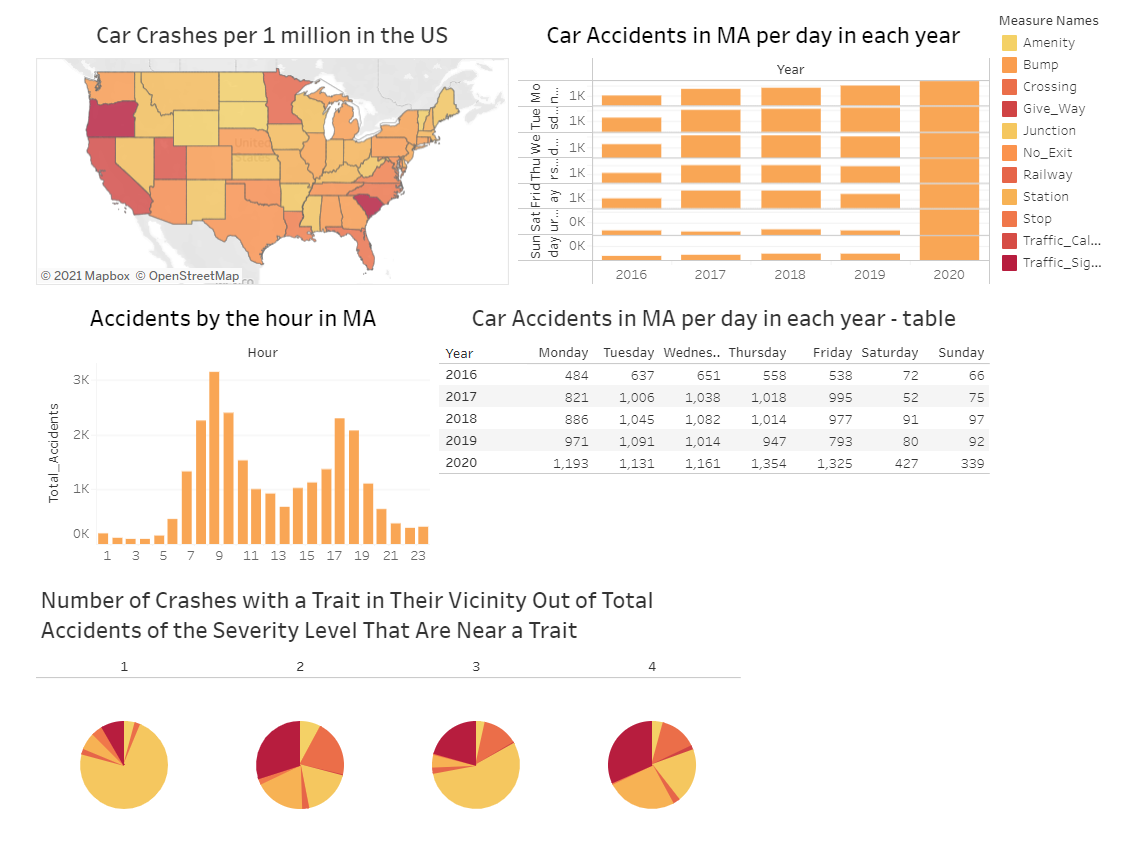

In [11]:
from IPython.display import Image
Image(filename = "part1.png", width = 600, height = 300)

### 6.2 The Tableau Dashboard link for part 2 is: